In [52]:
import pandas as pd 

data = pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [54]:
data['Age'] = data.Age.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [55]:
data_group_drug = data.groupby('Drug')
data_group_drug.Sex.describe()

,count,unique,top,freq
Drug,,,,
DrugY,91,2,F,47
drugA,23,2,M,14
drugB,16,2,M,10
drugC,16,2,M,9
drugX,54,2,F,27


In [56]:
data_group_drug.Age.describe()

,count,mean,std,min,25%,50%,75%,max
Drug,,,,,,,,
DrugY,91.0,43.747253,17.031731,15.0,28.50,42.0,58.00,74.0
drugA,23.0,35.869565,9.696786,19.0,30.00,36.0,44.00,50.0
drugB,16.0,62.500000,7.127412,51.0,57.75,60.0,68.50,74.0
drugC,16.0,42.500000,16.725230,16.0,27.50,47.0,50.75,72.0
drugX,54.0,44.018519,16.435685,15.0,32.00,45.0,56.75,74.0


In [57]:
data_group_drug.Cholesterol.describe()

,count,unique,top,freq
Drug,,,,
DrugY,91,2,HIGH,47
drugA,23,2,HIGH,12
drugB,16,2,HIGH,8
drugC,16,1,HIGH,16
drugX,54,2,NORMAL,34


In [58]:
data_group_sex = data.groupby('Sex')
data_group_sex.Age.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,96.0,42.562500,16.395643,15.0,28.0,40.0,57.0,74.0
M,104.0,45.932692,16.594691,15.0,33.5,47.0,60.0,74.0


In [59]:
"""import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.scatter(x= data.Age, y= data.Sex, alpha=0.5)
plt.yticks([0, 1], labels= [ 'Fenale', 'Male'])
plt.xlabel('Age')"""

"import matplotlib.pyplot as plt\nplt.figure(figsize=(8,3))\nplt.scatter(x= data.Age, y= data.Sex, alpha=0.5)\nplt.yticks([0, 1], labels= [ 'Fenale', 'Male'])\nplt.xlabel('Age')"

<Axes: ylabel='Sex'>

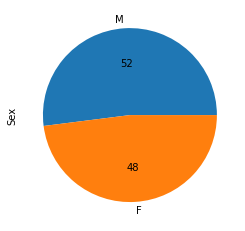

In [60]:
data.Sex.value_counts().plot(kind='pie', autopct='%.f')

In [61]:
data.Drug.unique(), data.BP.unique(), data.Cholesterol.unique()

(array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object))

In [62]:
data['Male'] = data['Sex'] == 'M'
data['High_Cholesterol'] = data['Cholesterol'] == 'HIGH'
data = pd.get_dummies(data, columns= ['BP'])
data

,Age,Sex,Cholesterol,Na_to_K,Drug,Male,High_Cholesterol,BP_HIGH,BP_LOW,BP_NORMAL
0,23,F,HIGH,25.355,DrugY,False,True,1,0,0
1,47,M,HIGH,13.093,drugC,True,True,0,1,0
2,47,M,HIGH,10.114,drugC,True,True,0,1,0
3,28,F,HIGH,7.798,drugX,False,True,0,0,1
4,61,F,HIGH,18.043,DrugY,False,True,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,F,HIGH,11.567,drugC,False,True,0,1,0
196,16,M,HIGH,12.006,drugC,True,True,0,1,0
197,52,M,HIGH,9.894,drugX,True,True,0,0,1
198,23,M,NORMAL,14.020,drugX,True,False,0,0,1


In [63]:
data = data.drop(['Sex', 'Cholesterol'], axis=1)
data

,Age,Na_to_K,Drug,Male,High_Cholesterol,BP_HIGH,BP_LOW,BP_NORMAL
0,23,25.355,DrugY,False,True,1,0,0
1,47,13.093,drugC,True,True,0,1,0
2,47,10.114,drugC,True,True,0,1,0
3,28,7.798,drugX,False,True,0,0,1
4,61,18.043,DrugY,False,True,0,1,0
...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,False,True,0,1,0
196,16,12.006,drugC,True,True,0,1,0
197,52,9.894,drugX,True,True,0,0,1
198,23,14.020,drugX,True,False,0,0,1


In [64]:
data['Male'] = data.Male.astype(int)
data['High_Cholesterol'] = data.High_Cholesterol.astype(int)

In [65]:
corr_matrix = data.corr
corr_matrix()




/tmp/ipykernel_7528/807925070.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix()


,Age,Na_to_K,Male,High_Cholesterol,BP_HIGH,BP_LOW,BP_NORMAL
Age,1.000000,-0.063119,0.102027,0.068234,-0.099782,0.112909,-0.009025
Na_to_K,-0.063119,1.000000,-0.125008,-0.010000,0.104985,0.043345,-0.156355
Male,0.102027,-0.125008,1.000000,0.008811,-0.021390,0.058356,-0.036868
High_Cholesterol,0.068234,-0.010000,0.008811,1.000000,-0.095708,-0.042036,0.145118
BP_HIGH,-0.099782,0.104985,-0.021390,-0.095708,1.000000,-0.542767,-0.511811
BP_LOW,0.112909,0.043345,0.058356,-0.042036,-0.542767,1.000000,-0.443749
BP_NORMAL,-0.009025,-0.156355,-0.036868,0.145118,-0.511811,-0.443749,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Na_to_K'}>,
        <Axes: title={'center': 'Male'}>],
       [<Axes: title={'center': 'High_Cholesterol'}>,
        <Axes: title={'center': 'BP_HIGH'}>,
        <Axes: title={'center': 'BP_LOW'}>],
       [<Axes: title={'center': 'BP_NORMAL'}>, <Axes: >, <Axes: >]],
      dtype=object)

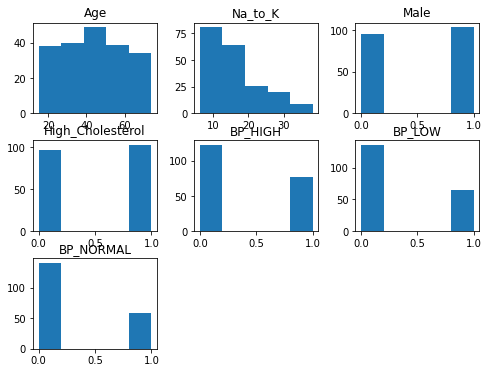

In [66]:
data.hist(bins=5, figsize=(8,6), grid= False,  )

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Na_to_K', ylabel='Age'>,
        <Axes: xlabel='Male', ylabel='Age'>,
        <Axes: xlabel='High_Cholesterol', ylabel='Age'>,
        <Axes: xlabel='BP_HIGH', ylabel='Age'>,
        <Axes: xlabel='BP_LOW', ylabel='Age'>,
        <Axes: xlabel='BP_NORMAL', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Na_to_K'>,
        <Axes: xlabel='Na_to_K', ylabel='Na_to_K'>,
        <Axes: xlabel='Male', ylabel='Na_to_K'>,
        <Axes: xlabel='High_Cholesterol', ylabel='Na_to_K'>,
        <Axes: xlabel='BP_HIGH', ylabel='Na_to_K'>,
        <Axes: xlabel='BP_LOW', ylabel='Na_to_K'>,
        <Axes: xlabel='BP_NORMAL', ylabel='Na_to_K'>],
       [<Axes: xlabel='Age', ylabel='Male'>,
        <Axes: xlabel='Na_to_K', ylabel='Male'>,
        <Axes: xlabel='Male', ylabel='Male'>,
        <Axes: xlabel='High_Cholesterol', ylabel='Male'>,
        <Axes: xlabel='BP_HIGH', ylabel='Male'>,
        <Axes: xlabel='BP_LOW', ylabel='Male'

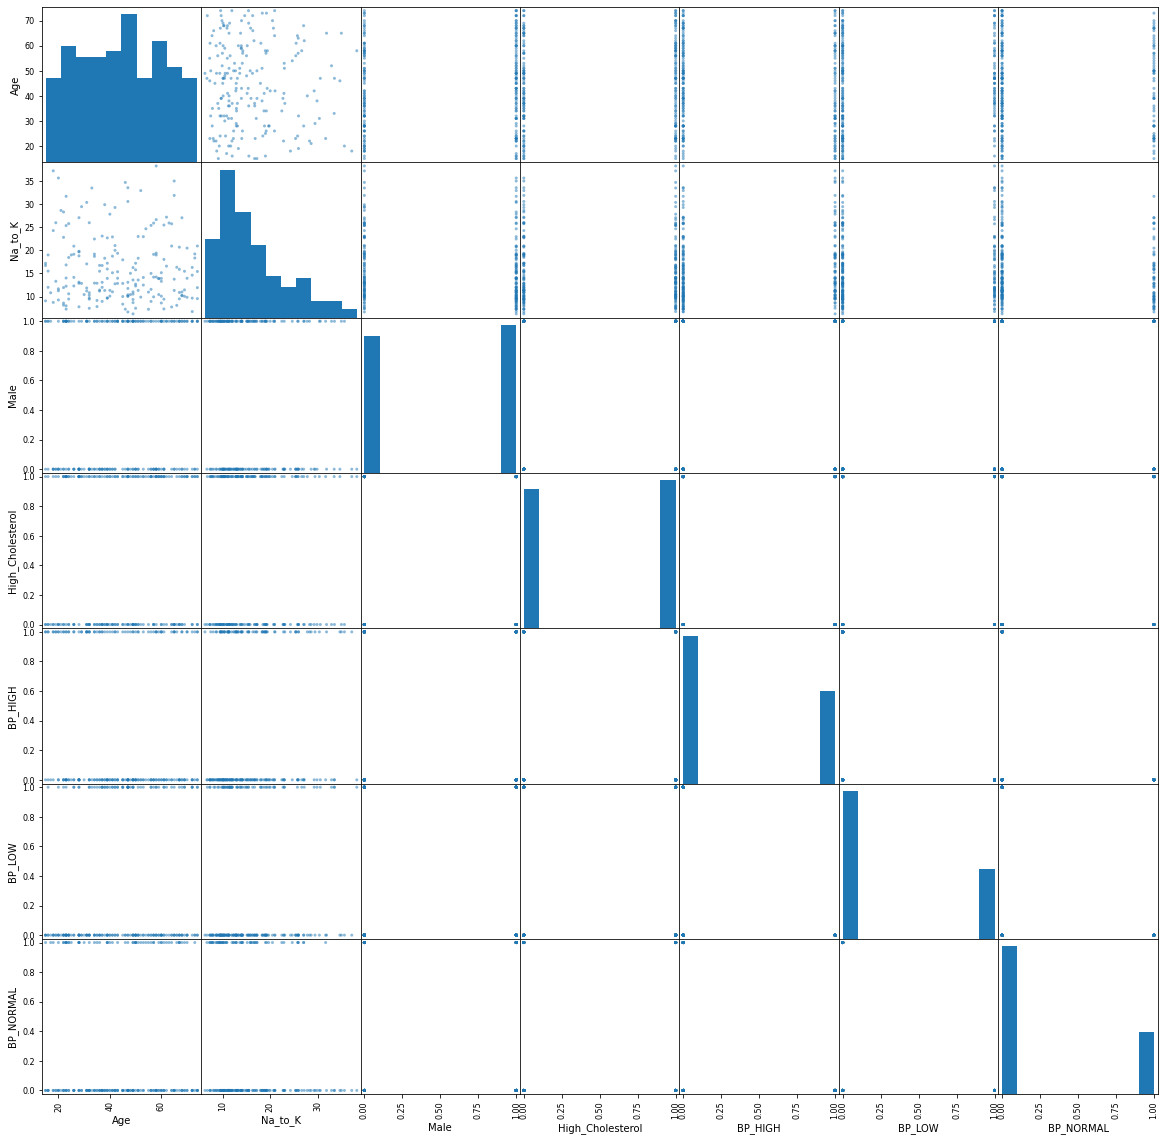

In [76]:
attributes = ["Age","Male"] 

pd.plotting.scatter_matrix(data, figsize=(20,20))

In [68]:
data.head()

,Age,Na_to_K,Drug,Male,High_Cholesterol,BP_HIGH,BP_LOW,BP_NORMAL
0,23,25.355,DrugY,0,1,1,0,0
1,47,13.093,drugC,1,1,0,1,0
2,47,10.114,drugC,1,1,0,1,0
3,28,7.798,drugX,0,1,0,0,1
4,61,18.043,DrugY,0,1,0,1,0


In [69]:
y = data.Drug
X = data.drop(['Drug'], axis=1)

In [70]:
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

X_model = [X, X_scaler]
pipelines = []
pipelines.append(('LR', Pipeline([('LR',LogisticRegression())])))
pipelines.append(('SVM', Pipeline([('SVC', SVC())])))
pipelines.append(('Random_Forest', Pipeline([('RFC', RandomForestClassifier())])))

results = []
model_results = []
model_predictions = []

for i in X_model:
    X_train, X_test, y_train, y_test = train_test_split(i,y,random_state=11, test_size=0.20)
    for name, model in pipelines:

        model.fit(X_train,y_train)
        model_score = model.score(X_test, y_test)
        predictions = [name , model.predict(X_test)]
        
        results = [name, model_score]
        model_results.append(results)
        model_predictions.append(predictions)
        
        msg = "%s: %f " % (name, model_score)
        print(msg)

/home/ml/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.925000 
SVM: 0.725000 
Random_Forest: 1.000000 
LR: 0.950000 
SVM: 0.950000 
Random_Forest: 1.000000 


In [72]:
model_predictions

[['LR',
  array(['drugA', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'DrugY',
         'drugB', 'drugB', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugB',
         'drugX', 'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugC',
         'drugA', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'DrugY',
         'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
         'drugA', 'drugA', 'drugB', 'drugX', 'DrugY'], dtype=object)],
 ['SVM',
  array(['drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY',
         'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY',
         'drugX', 'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX',
         'drugX', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY',
         'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
         'drugX', 'drugX', 'drugX', 'drugX', 'DrugY'], dtype=object)],
 ['Random_Forest',
  array(['drugA', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'DrugY',
         'drugB', 'DrugY', 'Dr